# Data Cleaning with Python and Pandas

In this project, I discuss various useful techniques to clean a messy dataset with Python, NumPy and Pandas.

This project is divided into various sections which are listed below:-

## Table of Contents:-

1.	Introduction to Python data cleaning

2.	Tidy data

3.	Signs of an untidy dataset

4.	Python data cleansing – prerequisites

5.	Import the required Python libraries

6.	The source dataset

7.	Exploratory data analysis (EDA)

8.	Visual exploratory data analysis (Visual EDA)

9.	Findings of EDA and Visual EDA

10.	Split the ‘age_sex’ column into two separate columns

11.	Reorder the column labels

12.	Dealing with negative numerical values

13.	Dealing with outliers

14.	Dealing with missing numerical values

15.	Check with ASSERT statement

16.	Reshaping the data into tidy data format


## 1. Introduction to Python data cleaning

Whenever we have to work with a real world dataset, the first problem that we face is to clean it. The real world dataset never comes clean. It consists lot of discrepancies in the dataset. So, we have to clean the dataset for further processing. 

Cleaning data is the process of preparing the dataset for analysis. It is very important because the accuracy of machine learning or data mining models are affected because of poor quality of data. 

So, data scientists spend a large amount of their time cleaning the dataset and transform them into a format with which they can work with. In fact, data scientists spend 80% of their time cleaning the data.

A very common scenario is that the dataset contains missing values coded as `NaN`. Also, the missing values are coded in different ways. The dataset may contain negative or invalid values. It may contain outliers. It may be in the untidy format. All of these are examples of a messy dataset. 

In this project, I present several useful ways to handle these discrepancies in the dataset.


## 2. Tidy data format


Data comes in a wide variety of shapes and formats. Hadley Wickham, the Chief Scientist at RStudio, write a paper about tidy data in 2014 that formalizes the shape of the data. So, it gives us a goal when formatting the data. 


He states in his paper that –

**"Tidy data provides a standard way to organize data values within a dataset."**


There are three principles of tidy data. These are as follows:-

**•	Columns represent separate variables.**

**•	Rows represent individual observations.**

**•	Observational units form tables.**


Tidy data makes it easier to fix common data problems. So, we need to transform the untidy dataset into tidy data. 

Before we look into the details of cleaning the dataset, we have to understand what constitutes an untidy data. We need to diagnose our data and find common signs of a messy dataset.


## 3. Signs of an untidy dataset


We have to take a closer look to find common signs of a messy dataset. These common signs are as follows:-


•	**Missing numerical data**

Missing numerical data needs to be identified and addressed. Either they need to be deleted or replaced with a suitable test statistic.


•	**Untidy data**

Untidy dataset can contain multiple problems. They prevent us from transforming the messy dataset into a clean dataset that is suitable for analysis.


•	**Unexpected data values**

Mismatched data types of a column and data values can cause potential problems. They need to be investigated and solved.


•	**Inconsistent column names**

Column names contain inconsistent capitalizations and bad characters. They need to be addressed properly.


•	**Outliers**

Outliers need to be detected. They pose potential problems needs to be investigated and removed.


•	**Duplicate rows and columns**

Duplicate rows and columns make data redundant. They can bias an analysis. Hence, they needs to be found and dropped.



## 4. Python data cleaning - prerequisites


We need three Python libraries for the data cleansing process – NumPy, Pandas and Matplotlib.


•	**NumPy** – NumPy is the fundamental Python library for scientific computing. It adds support for large and multi-dimensional arrays and matrices. It also supports large collection of high-level mathematical functions to operate on these arrays.


•	**Pandas** - Pandas is a software library for Python programming language which provide tools for data manipulation and analysis tasks. It will enable us to manipulate numerical tables and time series using data structures and operations.


•	**Matplotlib** - Matplotlib is the core data visualization library of Python programming language. It provides an object-oriented API for embedding plots into applications.


## 5. Import the required Python libraries


We have seen that we need three Python libraries – NumPy, Pandas and Matplotlib for the data cleaning process. We need to import these libraries before we actually start using them. We can import them with their usual shorthand notation as follows:-


In [22]:
# import the Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## 6. The source dataset


For this project, I have created a fictitious dataset. The dataset consists of details of my facebook friends.

The dataset can be imported as follows:-


In [23]:
data = "friends.txt"
# data frame nommé df à partir du fichier data
# csv= comma seperated value 
df = pd.read_csv(data)


## 7. Exploratory data analysis


Now, it is time to understand the data. We should diagnose the data for any discrepancies by doing exploratory data analysis.
We should proceed as follows:-


### df.shape attribute


We can check the dimensions of the data with **df.shape** attribute.


In [24]:
df.shape

(10, 10)

**Interpretation**

We can see that our data have 10 rows and 10 columns.

### df.head() and df.tail() methods


We can view the top five and bottom five rows of the dataset with **df.head()** and **df.tail()** methods respectively.


In [25]:
df.head()

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C
0,Rahul,Pandey,37_M,B,175.4,85.6,37,1500.0,200.0,300
1,Rakesh,Kumar,38_M,B,NaN,xx,38,NaN,1000.0,NaN
2,Nitesh,Mondol,35_M,B,165.1,?,35,500.0,-100.0,200
3,Arvind,Dwivedi,40_M,A,0,55.6,40,300.0,300.0,NaN
4,Nikhil,Shikharwar,39_M,B,160.8,160.0,39,200.0,NaN,300


In [26]:
df.tail()

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C
5,Ashutosh,Merothiya,36_M,A,xx,-60,36,100.0,400.0,NaN
6,Shubhro,Das,35_M,C,170.3,75.5,35,NaN,500.0,500
7,Suvendu,Das,34_M,C,155.1,56.8,34,1000.0,100.0,xx
8,Swadesh,Kumar,36_M,C,154.2,60.6,36,100.0,200.0,300
9,Arun,Vishwakarma,38_M,A,162.1,58.7,38,600.0,200.0,200


**Interpretation**

We can see that there are lot of discrepancies in the dataset. 


For example, the age and sex columns are combined together with an underscore. There should be two separate columns of age and sex. 


The height and weight columns contain missing values. Some values are coded as "xx", "?", "0" and negative values. 
They are all invalid values as height and weight must be positive real numbers.


The three columns spend_A, spend_B and spend_C denote spending at three supermarkets A,B and C. These columns must contain positive real numbers. The missing values in these columns denote nothing spend in that market. The negative value and the 
value coded as "xx" should be addressed properly.

### df.info() method

We can get a concise summary of the dataset with **df.info()** method. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fname       10 non-null     object 
 1   lname       10 non-null     object 
 2   age_sex     10 non-null     object 
 3   section     10 non-null     object 
 4   height(cm)  9 non-null      object 
 5   weight(kg)  10 non-null     object 
 6   age         10 non-null     int64  
 7   spend_A     8 non-null      float64
 8   spend_B     9 non-null      float64
 9   spend_C     7 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 928.0+ bytes


**Interpretation**

We can see that this method prints information of all columns. Several columns contain missing values. We have seen that columns contain missing and invalid values are coded differently. So, we need to explore this issue further.



### df.dtypes attribute

We can check the data types of each column in the dataframe with **df.dtypes** attribute. The above command returns 
the data type of each column.


In [28]:
df.dtypes

fname          object
lname          object
age_sex        object
section        object
height(cm)     object
weight(kg)     object
age             int64
spend_A       float64
spend_B       float64
spend_C        object
dtype: object

Also, we can see that data types of height(cm) and weight(kg) columns are object data type. Again this is not true. The columns height(cm) and weight(kg) must contain positive real numbers. So, their data type must be float64.

Also, spend_A, spend_B and spend_C columns must contain numeric values. We can see that the data type of spend_A and spend_B columns are float64. But the data type of column spend_C is object. So, we need to convert its data type to float64.

### Handling invalid values

There is an invalid value coded as "xx" in the height(cm) column. We can coerce invalid values to "NaN" using the errors keyword as follows:-

In [29]:
df["height(cm)"] = pd.to_numeric(df["height(cm)"], errors='coerce')

Similary, there is an invalid value coded as "xx" in the weight(kg) column. Again, we can coerce it using the errors keyword
as follows:-

In [30]:
df["weight(kg)"] = pd.to_numeric(df["weight(kg)"], errors='coerce')

Similary, there is an invalid value coded as "xx" in the spend_C column. Again, we can coerce it using the errors keyword
as follows:-

In [31]:
df["spend_C"] = pd.to_numeric(df["spend_C"], errors='coerce')

### Check the data type again with df.dtypes

In [32]:
df.dtypes

fname          object
lname          object
age_sex        object
section        object
height(cm)    float64
weight(kg)    float64
age             int64
spend_A       float64
spend_B       float64
spend_C       float64
dtype: object

**Interpretation**

Now, we can see that all the columns have appropriate data types. The columns height(cm) and weight(kg) have float64 data type.
The columns spend_A, spend_B and spend_C have float64 data type.

In [33]:
df.head()

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C
0,Rahul,Pandey,37_M,B,175.4,85.6,37,1500.0,200.0,300.0
1,Rakesh,Kumar,38_M,B,NaN,NaN,38,NaN,1000.0,NaN
2,Nitesh,Mondol,35_M,B,165.1,NaN,35,500.0,-100.0,200.0
3,Arvind,Dwivedi,40_M,A,0.0,55.6,40,300.0,300.0,NaN
4,Nikhil,Shikharwar,39_M,B,160.8,160.0,39,200.0,NaN,300.0


In [34]:
df.tail()

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C
5,Ashutosh,Merothiya,36_M,A,NaN,-60.0,36,100.0,400.0,NaN
6,Shubhro,Das,35_M,C,170.3,75.5,35,NaN,500.0,500.0
7,Suvendu,Das,34_M,C,155.1,56.8,34,1000.0,100.0,NaN
8,Swadesh,Kumar,36_M,C,154.2,60.6,36,100.0,200.0,300.0
9,Arun,Vishwakarma,38_M,A,162.1,58.7,38,600.0,200.0,200.0


**Interpretation**

We can see that all the invalid values(the values coded as "xx") and missing values are now coded as "NaN". The use of the 
keyword errors='coerce' enable us to convert all the invalid values into NaN.

### df.describe() method

We can view the summary statistics of numerical columns with **df.describe()** method. It enable us to detect outliers in the data which require further investigation.


In [35]:
df.describe()

,height(cm),weight(kg),age,spend_A,spend_B,spend_C
count,8.0000,8.000000,10.000000,8.000000,9.000000,6.000000
mean,142.8750,61.600000,36.800000,537.500000,311.111111,300.000000
std,58.1695,60.126985,1.932184,492.624169,310.017921,109.544512
min,0.0000,-60.000000,34.000000,100.000000,-100.000000,200.000000
25%,154.8750,56.500000,35.250000,175.000000,200.000000,225.000000
50%,161.4500,59.650000,36.500000,400.000000,200.000000,300.000000
75%,166.4000,78.025000,38.000000,700.000000,400.000000,300.000000
max,175.4000,160.000000,40.000000,1500.000000,1000.000000,500.000000


**Interpretation**

We can see that there are discrepancies in height(cm) and weight(kg) columns.

The minimum value of height(cm) is 0. It is not possible because height cannot be 0.

The minimum and maximum values of weight(kg) are -60 and 160. Weight cannot be negative and weight cannot be as high as 160. 
So, both are invalid values.

They are **outliers** and need to be properly addressed.

### df.columns attribute

We can get the column labels of the dataframe with **df.columns** attribute.


In [36]:
df.columns

Index(['fname', 'lname', 'age_sex', 'section', 'height(cm)', 'weight(kg)',
       'age', 'spend_A', 'spend_B', 'spend_C'],
      dtype='object')

## Visual Exploratory Data Analysis



Now, we should conduct data visualization to find discrepancies in the data. Data visualization is a great way to find 
errors in the data and detect outliers. They help us to detect patterns in the data.


We can use various types of plots for data visualization purpose. These plots are listed below:-


•	**Bar plot**

•	**Histograms**

•	**Box plot**

•	**Scatter plot**




### Bar plot

A bar plot is a plot that presents data with rectangular bars with lengths proportional to the values that they represent.

We can plot a bar plot of the age column as follows:-

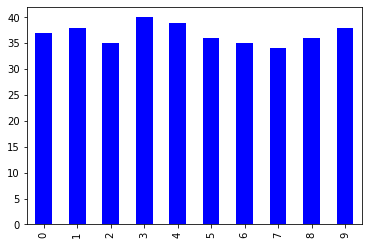

In [37]:
df['age'].plot(kind='bar',cmap='winter')

plt.show()

**Interpretation**

The bar plot shows that there are 10 counts of the age label. So, there are no missing values in the age column.

### Histograms


We use histograms for plotting continuous data counts. A histogram is a representation of the distribution of data.

In this case, we use histograms for plotting distribution of data values of height(cm) and weight(kg) columns.

We can draw a histogram as follows:-

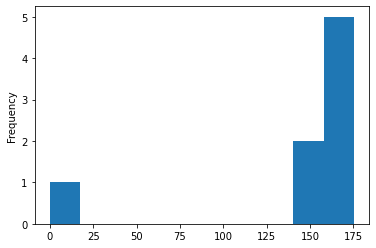

In [38]:
df['height(cm)'].plot(kind='hist')

plt.show()

**Interpretation**

The above histogram shows that there is a data value between 0 and 25. When we take a closer look , we find that there is a value of 0.0 in the height(cm) column. It is not possible as height cannot be 0. So, we need to take care of that.

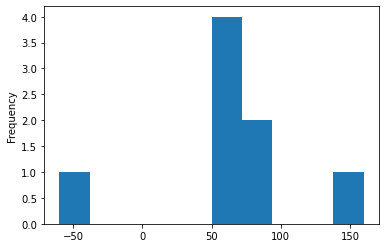

In [39]:
df['weight(kg)'].plot(kind='hist')

plt.show()

**Interpretation**

Similar analysis of histogram of weight(kg) column shows that there is a negative value of -60 and a very high value of 160 in 
the weight(kg) column. Both are invalid values. Weight cannot be negative and also weight cannot be so high. So, we need to take
care of these invalid values.

### Box plot


We can visualize basic summary statistics with box plot. Box plot let us to detect outliers in the data. They help us to find minimum and maximum values. They present 25th, 50th, 75th percentiles. 50th percentile value is the median value.

We can draw a boxplot as follows:-

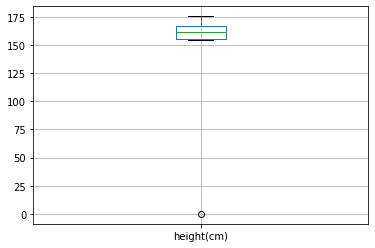

In [40]:
df.boxplot(column='height(cm)')

plt.show()

**Interpretation**

I have drawn the boxplot of the height(cm) column in the above cell. It confirms that there is a value of 0.0 in the 
height(cm) column. It is not possible as height cannot be 0. So, we need to take care of that.

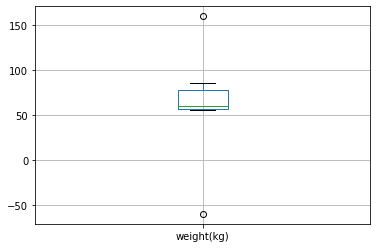

In [41]:
df.boxplot(column='weight(kg)')

plt.show()

**Interpretation**

I have drawn the boxplot of the weight(kg) column in the above cell. The above boxplot confirms our findings that there is a negative value of -60 and a very high value of 160 in the weight(kg) column. 

Both are invalid values. Weight cannot be negative and also weight cannot be so high. So, we need to take care of these invalid values.

### Scatter plot


Scatter plot help us to explore relationship between two numeric variables. It help us to identify potentially bad data.

We can draw a scatter plot of height(cm) and weight(kg) column as follows:-

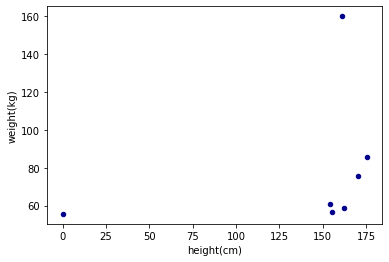

In [42]:
df.plot(kind='scatter',x='height(cm)', y='weight(kg)', c='DarkBlue')

plt.show()

**Interpretation**

The above scatter plot does not depict anything due to lack of data values. We need more data to identify relationship or pattern between data values.

## 9. Findings of EDA and Visual EDA


We can summarize the findings of EDA and visual EDA as follows:-



1.	The dataset has 10 rows and 10 columns.



2.	The age and sex columns are combined together with an underscore. There should be two separate columns of age and sex.



3.	All the invalid values (the values coded as "xx") and missing values in height (cm), weight (kg), spend_A, spend_B and spend_C columns are coded as "NaN". The use of the keyword errors='coerce' in pd.to_numeric() method enable us to convert all the invalid values into NaN.



4.	The data types of columns height (cm), weight(kg) and spend_C columns are converted into float64.



5.	In the height (cm) column, there is a value of 0.0. It is not possible as height cannot be 0. So, we need to resolve it.



6.	In the weight (kg) column, there is a negative value of -60 and a very high value of 160. Both are invalid values. Hence, we need to solve the issue.



7.	The three columns spend_A, spend_B and spend_C denote spending at three supermarkets A,B and C. These columns must contain positive real numbers. The missing values in these columns denote nothing spend in that market. We need to handle these missing values properly.



8.	In the spend_B column, there is a negative value -100. The amount spent cannot be negative. So, we need to take care of that.


## 10. Split ‘age_sex’ column 


We should split the 'age_sex' column into two separate columns. 

We can do this using the **df.str.split()** function as follows:-

In [43]:
df[['age','sex']] = df.age_sex.str.split("_", expand = True)

In [44]:
df.head()

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C,sex
0,Rahul,Pandey,37_M,B,175.4,85.6,37,1500.0,200.0,300.0,M
1,Rakesh,Kumar,38_M,B,NaN,NaN,38,NaN,1000.0,NaN,M
2,Nitesh,Mondol,35_M,B,165.1,NaN,35,500.0,-100.0,200.0,M
3,Arvind,Dwivedi,40_M,A,0.0,55.6,40,300.0,300.0,NaN,M
4,Nikhil,Shikharwar,39_M,B,160.8,160.0,39,200.0,NaN,300.0,M


We can see that now we have two separate columns for age and sex.

Now, there is no need for the age_sex column. So, we should drop that column.

We can drop 'age_sex' column using the **df.drop()** method as follows:-

In [45]:
df.drop(['age_sex'], axis=1, inplace=True)

In [46]:
df

,fname,lname,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C,sex
0,Rahul,Pandey,B,175.4,85.6,37,1500.0,200.0,300.0,M
1,Rakesh,Kumar,B,NaN,NaN,38,NaN,1000.0,NaN,M
2,Nitesh,Mondol,B,165.1,NaN,35,500.0,-100.0,200.0,M
3,Arvind,Dwivedi,A,0.0,55.6,40,300.0,300.0,NaN,M
4,Nikhil,Shikharwar,B,160.8,160.0,39,200.0,NaN,300.0,M
5,Ashutosh,Merothiya,A,NaN,-60.0,36,100.0,400.0,NaN,M
6,Shubhro,Das,C,170.3,75.5,35,NaN,500.0,500.0,M
7,Suvendu,Das,C,155.1,56.8,34,1000.0,100.0,NaN,M
8,Swadesh,Kumar,C,154.2,60.6,36,100.0,200.0,300.0,M
9,Arun,Vishwakarma,A,162.1,58.7,38,600.0,200.0,200.0,M


We can see that the 'age_sex' column has been dropped from the dataframe.



## 11. Reorder the column labels

Before that, we should reorder the columns for more pleasing visual appearance.

We can do it as follows:-

In [47]:
df = df[['fname','lname','age','sex','section','height(cm)','weight(kg)','spend_A','spend_B','spend_C']]

In [48]:
df

,fname,lname,age,sex,section,height(cm),weight(kg),spend_A,spend_B,spend_C
0,Rahul,Pandey,37,M,B,175.4,85.6,1500.0,200.0,300.0
1,Rakesh,Kumar,38,M,B,NaN,NaN,NaN,1000.0,NaN
2,Nitesh,Mondol,35,M,B,165.1,NaN,500.0,-100.0,200.0
3,Arvind,Dwivedi,40,M,A,0.0,55.6,300.0,300.0,NaN
4,Nikhil,Shikharwar,39,M,B,160.8,160.0,200.0,NaN,300.0
5,Ashutosh,Merothiya,36,M,A,NaN,-60.0,100.0,400.0,NaN
6,Shubhro,Das,35,M,C,170.3,75.5,NaN,500.0,500.0
7,Suvendu,Das,34,M,C,155.1,56.8,1000.0,100.0,NaN
8,Swadesh,Kumar,36,M,C,154.2,60.6,100.0,200.0,300.0
9,Arun,Vishwakarma,38,M,A,162.1,58.7,600.0,200.0,200.0


Now, we should move further to deal with missing and negative numerical values.

## 12. Dealing with negative numerical values

We have seen that, in the weight(kg) column, there is a negative value of -60. It is invalid value because weight cannot be negative. There is a high probability that weight is 60 kg and it is mistyped as -60. So, I will replace the negative value 
of -60 with positive value of 60.

We can do it as follows:-

In [49]:
# Suppress settingwithcopywarning

pd.set_option('mode.chained_assignment', None)

In [50]:
df['weight(kg)'].replace(-60, 60, inplace=True)

In [51]:
df

,fname,lname,age,sex,section,height(cm),weight(kg),spend_A,spend_B,spend_C
0,Rahul,Pandey,37,M,B,175.4,85.6,1500.0,200.0,300.0
1,Rakesh,Kumar,38,M,B,NaN,NaN,NaN,1000.0,NaN
2,Nitesh,Mondol,35,M,B,165.1,NaN,500.0,-100.0,200.0
3,Arvind,Dwivedi,40,M,A,0.0,55.6,300.0,300.0,NaN
4,Nikhil,Shikharwar,39,M,B,160.8,160.0,200.0,NaN,300.0
5,Ashutosh,Merothiya,36,M,A,NaN,60.0,100.0,400.0,NaN
6,Shubhro,Das,35,M,C,170.3,75.5,NaN,500.0,500.0
7,Suvendu,Das,34,M,C,155.1,56.8,1000.0,100.0,NaN
8,Swadesh,Kumar,36,M,C,154.2,60.6,100.0,200.0,300.0
9,Arun,Vishwakarma,38,M,A,162.1,58.7,600.0,200.0,200.0


We can see that the negative value of -60 is replaced with positive value of 60.

Similarly, in the spend_B column, there is a negative value -100. The amount spent cannot be negative. So, we need to replace this negative value of -100 with positive value of 100.

We can do it as follows:-

In [52]:
df['spend_B'].replace(-100,100, inplace=True)

In [53]:
df

,fname,lname,age,sex,section,height(cm),weight(kg),spend_A,spend_B,spend_C
0,Rahul,Pandey,37,M,B,175.4,85.6,1500.0,200.0,300.0
1,Rakesh,Kumar,38,M,B,NaN,NaN,NaN,1000.0,NaN
2,Nitesh,Mondol,35,M,B,165.1,NaN,500.0,100.0,200.0
3,Arvind,Dwivedi,40,M,A,0.0,55.6,300.0,300.0,NaN
4,Nikhil,Shikharwar,39,M,B,160.8,160.0,200.0,NaN,300.0
5,Ashutosh,Merothiya,36,M,A,NaN,60.0,100.0,400.0,NaN
6,Shubhro,Das,35,M,C,170.3,75.5,NaN,500.0,500.0
7,Suvendu,Das,34,M,C,155.1,56.8,1000.0,100.0,NaN
8,Swadesh,Kumar,36,M,C,154.2,60.6,100.0,200.0,300.0
9,Arun,Vishwakarma,38,M,A,162.1,58.7,600.0,200.0,200.0


Again, we can see that the negative value of -100.0 in spend_B column is replaced with positive value of 100.0

## 13. Dealing with outliers



In the height(cm) column, there is a value of 0.0. It is not possible as height cannot be 0. So, we need to resolve it.

I will replace the 0.0 value with the mean of the height(cm) column. It can be done as follows:-

In [54]:
mean = df['height(cm)'].mean()

In [55]:
df['height(cm)'].replace(0.0, mean, inplace=True)

In [56]:
df

,fname,lname,age,sex,section,height(cm),weight(kg),spend_A,spend_B,spend_C
0,Rahul,Pandey,37,M,B,175.400,85.6,1500.0,200.0,300.0
1,Rakesh,Kumar,38,M,B,NaN,NaN,NaN,1000.0,NaN
2,Nitesh,Mondol,35,M,B,165.100,NaN,500.0,100.0,200.0
3,Arvind,Dwivedi,40,M,A,142.875,55.6,300.0,300.0,NaN
4,Nikhil,Shikharwar,39,M,B,160.800,160.0,200.0,NaN,300.0
5,Ashutosh,Merothiya,36,M,A,NaN,60.0,100.0,400.0,NaN
6,Shubhro,Das,35,M,C,170.300,75.5,NaN,500.0,500.0
7,Suvendu,Das,34,M,C,155.100,56.8,1000.0,100.0,NaN
8,Swadesh,Kumar,36,M,C,154.200,60.6,100.0,200.0,300.0
9,Arun,Vishwakarma,38,M,A,162.100,58.7,600.0,200.0,200.0


We can see that the data value of 0.0 in height(cm) column is replaced by a proper height value.

In the weight(kg) column, there is a very high absurd value of 160. It is not possible to have so much weight. Hence, it is invalid value. There is a high chance that the weight is 60 kg and it is mistakenly typed as 160 kg. So, I will replace the 160 
data value with 60.

It can be done as follows:-

In [57]:
df['weight(kg)'].replace(160.0, 60.0, inplace=True)

In [58]:
df

,fname,lname,age,sex,section,height(cm),weight(kg),spend_A,spend_B,spend_C
0,Rahul,Pandey,37,M,B,175.400,85.6,1500.0,200.0,300.0
1,Rakesh,Kumar,38,M,B,NaN,NaN,NaN,1000.0,NaN
2,Nitesh,Mondol,35,M,B,165.100,NaN,500.0,100.0,200.0
3,Arvind,Dwivedi,40,M,A,142.875,55.6,300.0,300.0,NaN
4,Nikhil,Shikharwar,39,M,B,160.800,60.0,200.0,NaN,300.0
5,Ashutosh,Merothiya,36,M,A,NaN,60.0,100.0,400.0,NaN
6,Shubhro,Das,35,M,C,170.300,75.5,NaN,500.0,500.0
7,Suvendu,Das,34,M,C,155.100,56.8,1000.0,100.0,NaN
8,Swadesh,Kumar,36,M,C,154.200,60.6,100.0,200.0,300.0
9,Arun,Vishwakarma,38,M,A,162.100,58.7,600.0,200.0,200.0


We can see that the data value of 160.0 in the weight(kg) column is replaced by 60.0 and thus I handle the outliers. 

## 14.	Dealing with missing numerical values

The following commands help us to deal with missing numerical values.


`df.isnull()`

The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False. 


`df.isnull.sum()`

The above command returns the total number of missing values in each column in the dataset.



**isna()** and **notna()** functions to detect ‘NA’ values


Pandas provides isna() and notna() functions to detect ‘NA’ values. These are also methods on Series and DataFrame objects.


Examples of isna() and notna() commands


We can detect ‘NA’ values in the dataframe with the following command:-


`df.isna()`



We can detect ‘NA’ values in a particular column in the dataframe


`pd.isna(df[‘col_name’])`


`df[‘col_name’].notna()`


So, we can check the number of missing values in each column in the dataset as follows:-


In [59]:
df.isnull().sum()

fname         0
lname         0
age           0
sex           0
section       0
height(cm)    2
weight(kg)    2
spend_A       2
spend_B       1
spend_C       4
dtype: int64

We can see that there are lots of missing values in the dataset.

### Fill missing values with a test statistic


In this method, we fill the missing values with a test statistic like mean, median or mode of the particular feature the missing value belongs to. One can also specify a forward-fill or back-fill to propagate the next values backward or previous value forward.



### Filling missing values with a test statistic like mean


`mean = df['col_name'].mean()`


`df['col_name'].fillna(value = median, inplace = True )`



###  We can also use replace() in place of fillna()


`df[‘col_name’].replace(to_replace = NaN, value = median, inplace = True)`


If we choose this method, then we should compute the median value on the training set and use it to fill the missing values in the training set. Then we should save the median value that we have computed.  Later, we will replace missing values in the test set with the median value to evaluate the system.



We can calculate the missing variables and use it to fill the missing values as follows:-

In [60]:
mean_height = df['height(cm)'].mean()

df['height(cm)'].fillna(mean_height, inplace=True)

In [61]:
mean_weight = df['weight(kg)'].mean()

df['weight(kg)'].fillna(mean_weight, inplace=True)

In [62]:
mean_spend_A = df['spend_A'].mean()

df['spend_A'].fillna(mean_spend_A, inplace=True)

In [63]:
mean_spend_B = df['spend_B'].mean()

df['spend_B'].fillna(mean_spend_B, inplace=True)

In [64]:
mean_spend_C = df['spend_C'].mean()

df['spend_C'].fillna(mean_spend_C, inplace=True)

We have calculated the mean variables and use them to fill the missing values.

In [65]:
# Again check for missing values

df.isnull().sum()

fname         0
lname         0
age           0
sex           0
section       0
height(cm)    0
weight(kg)    0
spend_A       0
spend_B       0
spend_C       0
dtype: int64

We can see that there are no missing values in the dataframe. 

We can confirm this with **ASSERT** statement as follwos:-

## 15. Check with ASSERT statement

Finally, we can check for missing values programmatically. If we drop or fill missing values, we expect no missing values. 
We can write an assert statement to verify this. So, we can use an assert statement to programmatically check that no 
missing or unexpected ‘0’ value is present. This gives confidence that our code is running properly.


Assert statement will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

Asserts


•	assert 1 == 1   (return Nothing if the value is True)


•	assert 1 == 2   (return AssertionError if the value is False)


We can check with assert statement as follows:-


In [66]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()


In [67]:
#assert all values are greater than 0

assert (df["spend_A"] >=0).all()



The assert statement returns nothing. So, we can conclude that there are no missing values in the dataset and all the values 
are greater than zero.

We can confirm this by looking at the dataframe.

In [68]:
df

,fname,lname,age,sex,section,height(cm),weight(kg),spend_A,spend_B,spend_C
0,Rahul,Pandey,37,M,B,175.400000,85.6,1500.0,200.000000,300.0
1,Rakesh,Kumar,38,M,B,160.734375,64.1,537.5,1000.000000,300.0
2,Nitesh,Mondol,35,M,B,165.100000,64.1,500.0,100.000000,200.0
3,Arvind,Dwivedi,40,M,A,142.875000,55.6,300.0,300.000000,300.0
4,Nikhil,Shikharwar,39,M,B,160.800000,60.0,200.0,333.333333,300.0
5,Ashutosh,Merothiya,36,M,A,160.734375,60.0,100.0,400.000000,300.0
6,Shubhro,Das,35,M,C,170.300000,75.5,537.5,500.000000,500.0
7,Suvendu,Das,34,M,C,155.100000,56.8,1000.0,100.000000,300.0
8,Swadesh,Kumar,36,M,C,154.200000,60.6,100.0,200.000000,300.0
9,Arun,Vishwakarma,38,M,A,162.100000,58.7,600.0,200.000000,200.0


We can see that there are no missing or negative values in the dataframe. 

## 16. Reshaping the data into tidy data format

When we take a closer look at the dataframe, we can see that our dataframe is not in the tidy data format.

The columns spend_A, spend_B and spend_C contain values of amount spent rather than variables. We should reorganize our 
dataframe into tidy data format.

We can convert it into the tidy data format using the **pd.melt()** function as follows:-

In [69]:
pd.melt(frame=df, id_vars=['fname','lname','age','sex','section','height(cm)','weight(kg)'],
                    value_vars=['spend_A','spend_B','spend_C'], var_name='expenditure', value_name='amount')

,fname,lname,age,sex,section,height(cm),weight(kg),expenditure,amount
0,Rahul,Pandey,37,M,B,175.400000,85.6,spend_A,1500.000000
1,Rakesh,Kumar,38,M,B,160.734375,64.1,spend_A,537.500000
2,Nitesh,Mondol,35,M,B,165.100000,64.1,spend_A,500.000000
3,Arvind,Dwivedi,40,M,A,142.875000,55.6,spend_A,300.000000
4,Nikhil,Shikharwar,39,M,B,160.800000,60.0,spend_A,200.000000
5,Ashutosh,Merothiya,36,M,A,160.734375,60.0,spend_A,100.000000
6,Shubhro,Das,35,M,C,170.300000,75.5,spend_A,537.500000
7,Suvendu,Das,34,M,C,155.100000,56.8,spend_A,1000.000000
8,Swadesh,Kumar,36,M,C,154.200000,60.6,spend_A,100.000000
9,Arun,Vishwakarma,38,M,A,162.100000,58.7,spend_A,600.000000


Now, when we look at our data, we can see that there are no missing or negative values. There are no outliers in our data. Lastly, our data is in the tidy data format.

This concludes the data cleaning process for friends dataset.